In [4]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## YamNet

In [5]:
# Load the model from url
yamnet_model_handle = 'https://tfhub.dev/google/yamnet/1'
yamnet_model = hub.load(yamnet_model_handle)

In [9]:
# Input files
testing_wav_file_name1 = "test1.wav"
testing_wav_file_name2 = "test2.wav"

In [11]:
# Utility functions for loading audio files and making sure the sample rate is correct.

@tf.function
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
          file_contents,
          desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

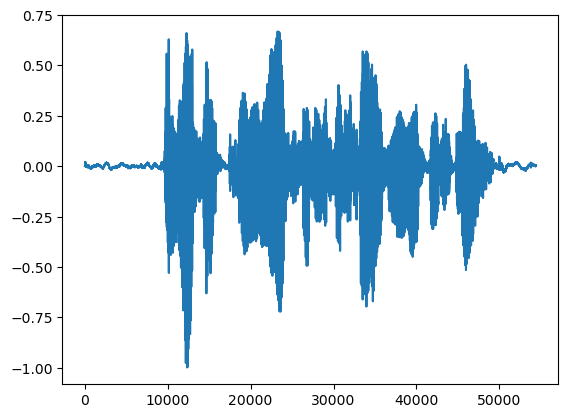

In [20]:
testing_wav_data = load_wav_16k_mono(testing_wav_file_name1)

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data, rate=16000)


In [21]:
_, embeddings1, _ = yamnet_model(testing_wav_data)
embeddings1.get_shape()

TensorShape([7, 1024])

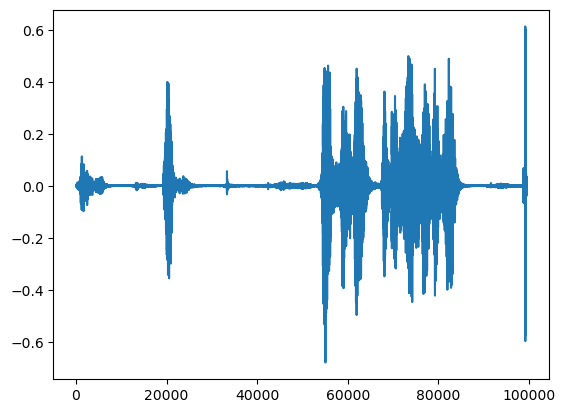

In [22]:
testing_wav_data = load_wav_16k_mono(testing_wav_file_name2)

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data, rate=16000)


In [23]:
_, embeddings2, _ = yamnet_model(testing_wav_data)
print (embeddings2.get_shape())

(12, 1024)
